<font size="6">Data Structure for storing Keys with their respective Priorities</font>

In [1]:
class Node:
    def __init__ (self, name, prio):
        self.Name = name
        self.Prio = prio

<font size="6">Storage for Elements of Priority Queue</font>

In [2]:
# Heap
Elements = []
Heapsize = 0
# non-Heap
lin_Elements = []
lin_size = 0

<font size="6">Helper Functions for easier access to Children/Parents of a given Element in Heap</font>

In [3]:
def parent (i):
    return (i-1)//2 # "//" means division with floor function (round down)

def left (i):
    return 2*i+1

def right (i):
    return 2*i+2

<font size="6">Statistics to be counted</font>

In [4]:
# Statistics for Heap Implementation
amt_key_comparisons = 0
key_comparisons_per_operation = []
# Statistics for Array implementation not using the Heap Data Structure 
lin_amt_key_comparisons = 0
lin_key_comparisons_per_operation= []
# Keeping Track of Indices to highlight
extraction_indices, reduction_indices = [], []
# Averaging
avg_comparisons_per_operation, lin_avg_comparisons_per_operation = [], []

<font size="6">Function to calculate the Average per Operation</font>

In [5]:
def calculate_average ():
    global avg_comparisons_per_operation, lin_avg_comparisons_per_operation
    for i,amt in enumerate(key_comparisons_per_operation):
         avg_comparisons_per_operation.append (amt/(i+1))   
    for i,amt in enumerate(lin_key_comparisons_per_operation):
         lin_avg_comparisons_per_operation.append (amt/(i+1))

<font size="6">Function to reset Priority Queue</font>

In [6]:
def ResetPQ ():
    global Elements, Heapsize, lin_Elements, lin_size
    global amt_key_comparisons, lin_amt_key_comparisons, key_comparisons_per_operation, lin_key_comparisons_per_operation
    global avg_comparisons_per_operation, lin_avg_comparisons_per_operation
    global extraction_indices, reduction_indices
    # For the Implementation
    Elements, Heapsize = [], 0
    lin_Elements, lin_size = [], 0
    # Counting Comparisons
    amt_key_comparisons, lin_amt_key_comparisons = 0, 0
    key_comparisons_per_operation, lin_key_comparisons_per_operation = [], []
    # Averaging the outcome
    avg_comparisons_per_operation, lin_avg_comparisons_per_operation = [], []
    # Keeping Track at which point an extraction or reduction is occuring as opposed to insertions (for visualization)
    extraction_indices, reduction_indices = [], []

<font size="6">Implementation of a Priority Queue (Statistics)</font>

In [7]:
def Insert_Key (name, prio):
    global Elements, Heapsize
    Elements.append (Node (name, float('inf'))) # float('inf') = positive infinity
    Heap_Decrease_Key (Heapsize, prio)
    Heapsize += 1   
            
def Heap_Decrease_Key (i, prio):
    global Elements
    global amt_key_comparisons      
    Elements [i].Prio = prio
    while i > 0 and Elements [parent (i)].Prio > Elements [i].Prio:
        amt_key_comparisons += 1
        Elements [i], Elements [parent (i)] = Elements [parent (i)], Elements [i]
        i = parent (i)
    if i != 0: # in case that it is not appended, it also checks the prio of the Element smaller than itself
        amt_key_comparisons += 1
        
def Extract_Min ():
    global Elements, Heapsize
    global amt_key_comparisons    
    min_element = Elements [0]
    Heapsize -= 1
    Elements = Elements [1:]
    Min_Heapify (0)
        
def Min_Heapify (i):
    global Elements, Heapsize
    global amt_key_comparisons
    l = left (i)
    r = right (i)   
    if l < Heapsize and Elements [l].Prio < Elements [i].Prio:
        minimum = l
        amt_key_comparisons += 1
    else:
        minimum = i
        amt_key_comparisons += 1
    if r < Heapsize and Elements [r].Prio < Elements [minimum].Prio:
        minimum = r
    if r < Heapsize: # Key Comparison only happens when the Index is not already out of range
        amt_key_comparisons += 1
    if minimum != i: # Index Comparison. not a key comparison
        Elements [i], Elements [minimum] = Elements [minimum], Elements [i]
        Min_Heapify (minimum)
    
def Reduce_Priority (name, new_prio):
    global Elements   
    key_found = False  
    for index, el in enumerate(Elements):
        if el.Name == name:
            key_found = True
            at_index = index
            break          
    if not key_found:
        return
    Heap_Decrease_Key (at_index,new_prio)

<font size="6">Implementation of a Priority Queue not using a Heap Structure (Statistics)</font>

In [8]:
def lin_Insert_Key (name, prio):
    global lin_Elements, lin_size
    global lin_amt_key_comparisons
    name_already_exists = False
    for el in lin_Elements:
        if el.Name == name:
            name_already_exists = True
    if not name_already_exists:
        i = 0
        if lin_size == 0:
            lin_Elements.append (Node (name, prio))
            lin_size += 1
            return
        while i < lin_size and lin_Elements [i].Prio < prio:
            lin_amt_key_comparisons += 1
            i += 1
                
        if i < lin_size: # in case that it is not appended, it also checks the prio of the Element bigger than itself
            lin_amt_key_comparisons += 1        
        lin_Elements.insert (i,Node (name, prio))
        lin_size += 1
            
def lin_Reduce_Priority (name, new_prio):
    global lin_Elements   
    key_found = False  
    for index, el in enumerate(lin_Elements):
        if el.Name == name:
            key_found = True
            at_index = index
            break          
    if not key_found:      
        return     
    if lin_Elements [at_index].Prio <= new_prio: 
        return
    lin_Adjust_Priority (at_index, new_prio)
    
def lin_Adjust_Priority (at_index, new_prio):
    global lin_Elements, lin_size
    global lin_amt_key_comparisons
    temp = lin_Elements [at_index]
    temp.Prio = new_prio
    del lin_Elements [at_index] # deletes temp from Array
    lin_size -= 1
    i = 0
    if lin_size == 0:
        lin_Elements.append (Node (temp.Name, temp.Prio))
        lin_size += 1
    while i < lin_size and lin_Elements [i].Prio < new_prio:
        i += 1
        lin_amt_key_comparisons += 1
    if i == lin_size: # in case it is appended, there isnt one more check
        lin_amt_key_comparisons += 1 # checks once more than it executes
    lin_Elements.insert (i,Node (temp.Name, temp.Prio))
    lin_size += 1
    
def lin_Extract_Min ():
    global lin_Elements, lin_size
    if lin_size < 1:
        return
    min_element = lin_Elements [0]
    lin_Elements = lin_Elements [1:]
    lin_size -= 1

<font size="6">Functions which call both Implementations so that they may be compared on equal Inputs</font>

In [9]:
import random

def stat_Reduce_Priority ():
    # Choosing which Element to reduce to what new Priority (Random)
    to_be_reduced = Elements [random.randint (0,len(Elements)-1)]
    lowerlimit = 0
    upperlimit = to_be_reduced.Prio - 1
    if lowerlimit >= upperlimit: # Example: Something is reduced twice: Once from 1 to 0 and then once again. Since it has to decrease, it must become negative
        lowerlimit = upperlimit - 1 # makes sure that there is always a valid range of options for the random integer function
    reduced_to = random.randrange(lowerlimit, upperlimit)
    # Now the operation itself
    Reduce_Priority (to_be_reduced.Name, reduced_to)
    lin_Reduce_Priority (to_be_reduced.Name, reduced_to)
    key_comparisons_per_operation.append (amt_key_comparisons)
    lin_key_comparisons_per_operation.append (lin_amt_key_comparisons) 

def stat_Insert_Key (name, prio):
    Insert_Key (name, prio)
    lin_Insert_Key (name, prio)
    key_comparisons_per_operation.append (amt_key_comparisons)
    lin_key_comparisons_per_operation.append (lin_amt_key_comparisons)

def stat_Extract_Min ():
    Extract_Min ()
    lin_Extract_Min ()
    key_comparisons_per_operation.append (amt_key_comparisons)
    lin_key_comparisons_per_operation.append (lin_amt_key_comparisons)  

<font size="6">Function that takes Data as Input and produces a graphical Output</font>

In [10]:
import matplotlib.pyplot as plt

def Visualize (total_operation_indices, heapdata, nonheapdata, labelstrings, overall_average = False):   
    global extraction_indices, reduction_indices
    plt.rcParams['figure.figsize'] = [20, 12]    
    # Heap Data
    plt.plot (total_operation_indices, heapdata, color = 'tomato', label = 'Heap', linewidth=5.0)
    plt.scatter (total_operation_indices, heapdata, color = 'tomato', s=150)
    # non-Heap Data
    plt.plot (total_operation_indices, nonheapdata, label = 'non-Heap', linewidth=5.0)
    plt.scatter (total_operation_indices, nonheapdata, s=150)
    # Extraction Data 
    if extraction_indices:
        heap_extraction_values_at_indices = []
        lin_extraction_values_at_indices = []
        for j in extraction_indices:
            heap_extraction_values_at_indices.append(heapdata [j-1]) # j - 1 since extraction_indices start at 1 while regular indices start at 0
            lin_extraction_values_at_indices.append(nonheapdata [j-1])
        plt.scatter (extraction_indices, heap_extraction_values_at_indices, color = 'forestgreen', label = 'Extractions', s = 300)
        plt.scatter (extraction_indices, lin_extraction_values_at_indices, color = 'forestgreen', s = 300) 
    # Reduction Data
    if reduction_indices:
        heap_reduction_values_at_indices = []
        lin_reduction_values_at_indices = []
        for j in reduction_indices:
            heap_reduction_values_at_indices.append(heapdata [j-1]) # j - 1 since extraction_indices start at 1 while regular indices start at 0
            lin_reduction_values_at_indices.append(nonheapdata [j-1])
        plt.scatter (reduction_indices, heap_reduction_values_at_indices, color = 'tab:pink', label = 'Reductions', s = 300)
        plt.scatter (reduction_indices, lin_reduction_values_at_indices, color = 'tab:pink', s = 300) 
    # Tick fontsize
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # Title and Axes lables
    plt.title (labelstrings [0], fontsize = 25)   
    if overall_average: # in case you want to show the "average of the averages" in a single number
        sumofheapdata = 0
        for num in heapdata:
            sumofheapdata += num
        avg_heap = sumofheapdata / len (heapdata)
        sumofnonheapdata = 0
        for num in nonheapdata:
            sumofnonheapdata += num
        avg_nonheap = sumofnonheapdata / len (nonheapdata)
        if avg_heap < avg_nonheap:
            betterone = "Heap"
            advantageinpercent = round (avg_nonheap / avg_heap * 100, 2) # TODO GIVE ADVANTAGE IN PERCENT
        else:
            betterone = "non-Heap"
            advantageinpercent = round (avg_heap / avg_nonheap * 100,2) 
        plt.xlabel(labelstrings [1]+"\nOverall Average: "+str(round(avg_heap, 2))+" for Heap and " +str(round(avg_nonheap, 2)) 
                   +" for non-Heap per Insertion for "+str(len (heapdata))+" insertions"+ "\n"+betterone+" is "+str(advantageinpercent)+"% better", fontsize = 20)
    else:
        plt.xlabel(labelstrings [1], fontsize = 20)
    plt.ylabel(labelstrings [2], fontsize = 20)
    plt.grid(True) # Figured it'd be better with grid on
    plt.legend (fontsize = 30)
    plt.show ()

<font size="6">Worst Case for non-Heap Implementation, BC for Heap (Inserting in Ascending Order)</font>

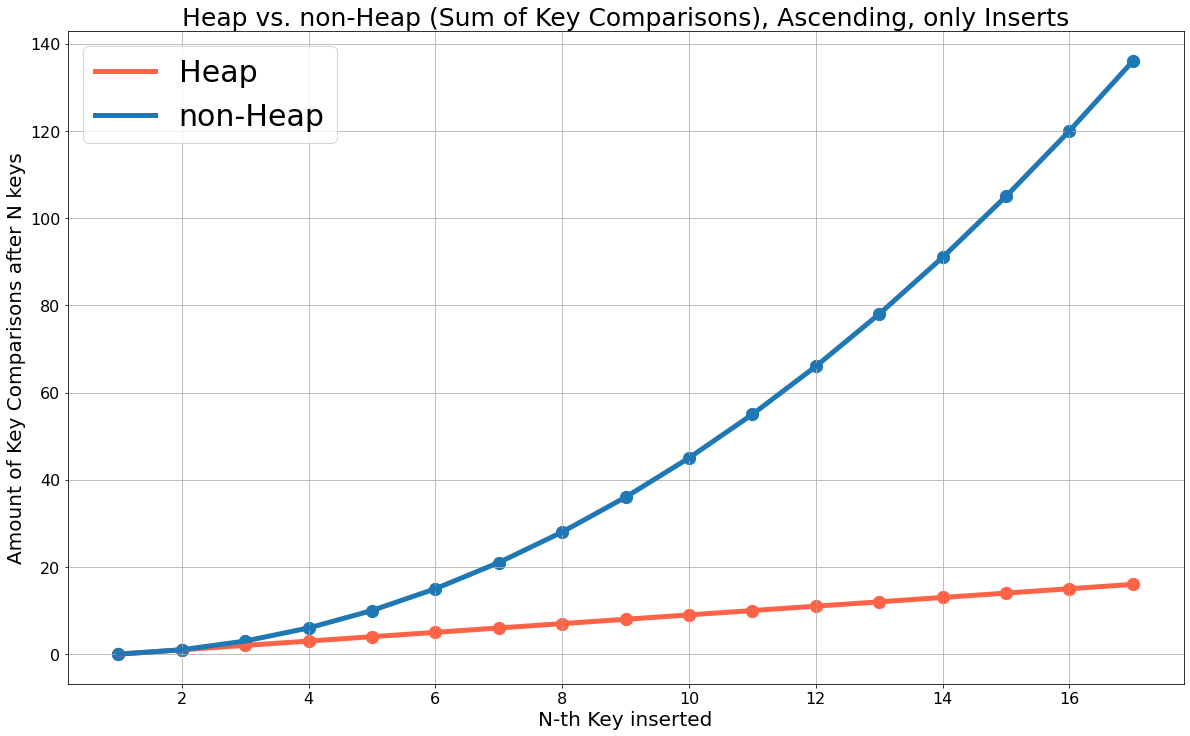

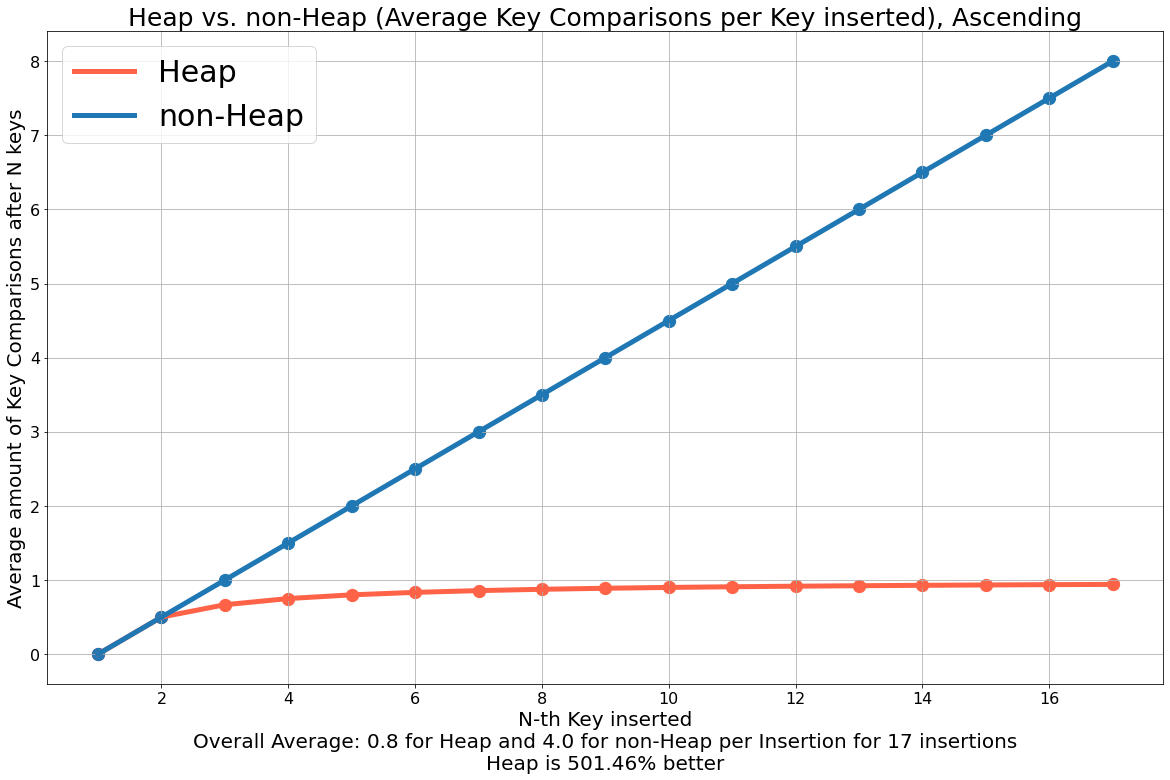

In [11]:
####################
N = 17 # Amount of Elements to be inserted in Ascending Order, feel free to change
####################

insertions = list (range (1,N+1))
for j in insertions:
    stat_Insert_Key (str(j),j)
amt_keys_inserted = list(range(1, len (insertions)+1))

labelstrings = ["Heap vs. non-Heap (Sum of Key Comparisons), Ascending, only Inserts", "N-th Key inserted", "Amount of Key Comparisons after N keys"]
Visualize (amt_keys_inserted, key_comparisons_per_operation, lin_key_comparisons_per_operation, labelstrings)

####################### Above Overall Sum, below Average per Insert

calculate_average ()
    
labelstring = ["Heap vs. non-Heap (Average Key Comparisons per Key inserted), Ascending", "N-th Key inserted", "Average amount of Key Comparisons after N keys"]
Visualize (amt_keys_inserted, avg_comparisons_per_operation, lin_avg_comparisons_per_operation, labelstring, overall_average = True)

ResetPQ () # Resets Data for next test (ignore)

<font size="6">Best Case for non-Heap Implementation, WC for Heap (Inserting in Descending Order)</font>

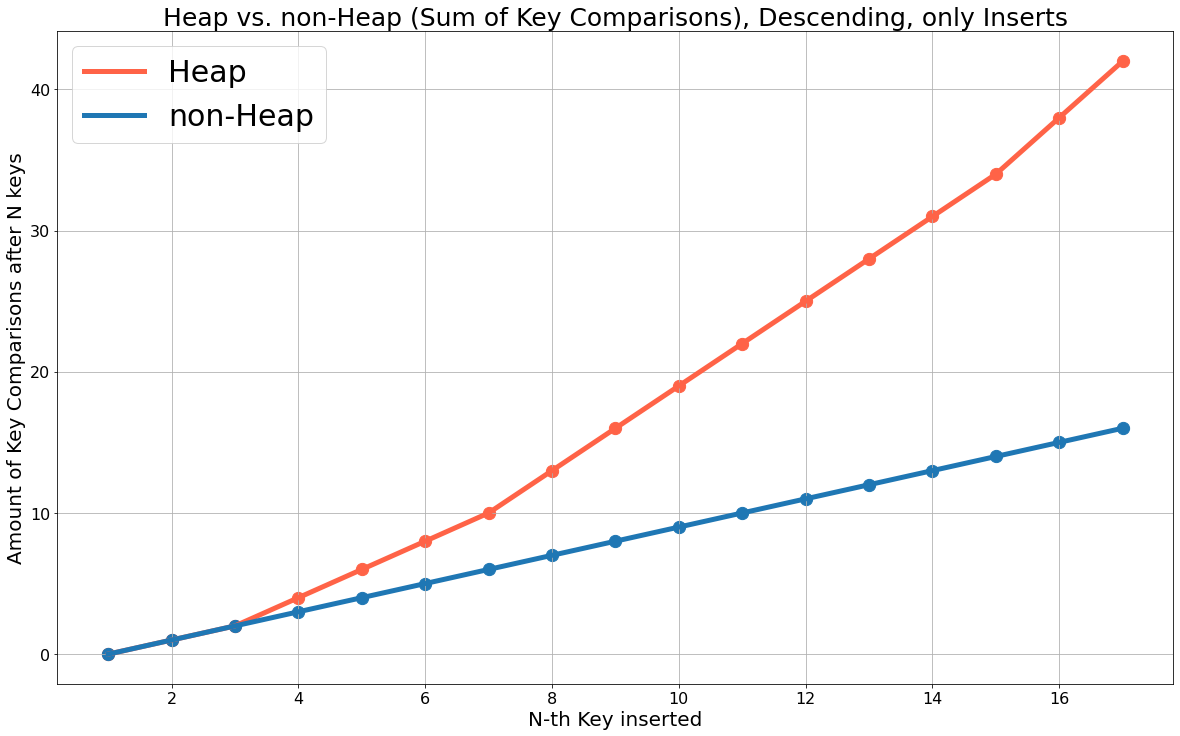

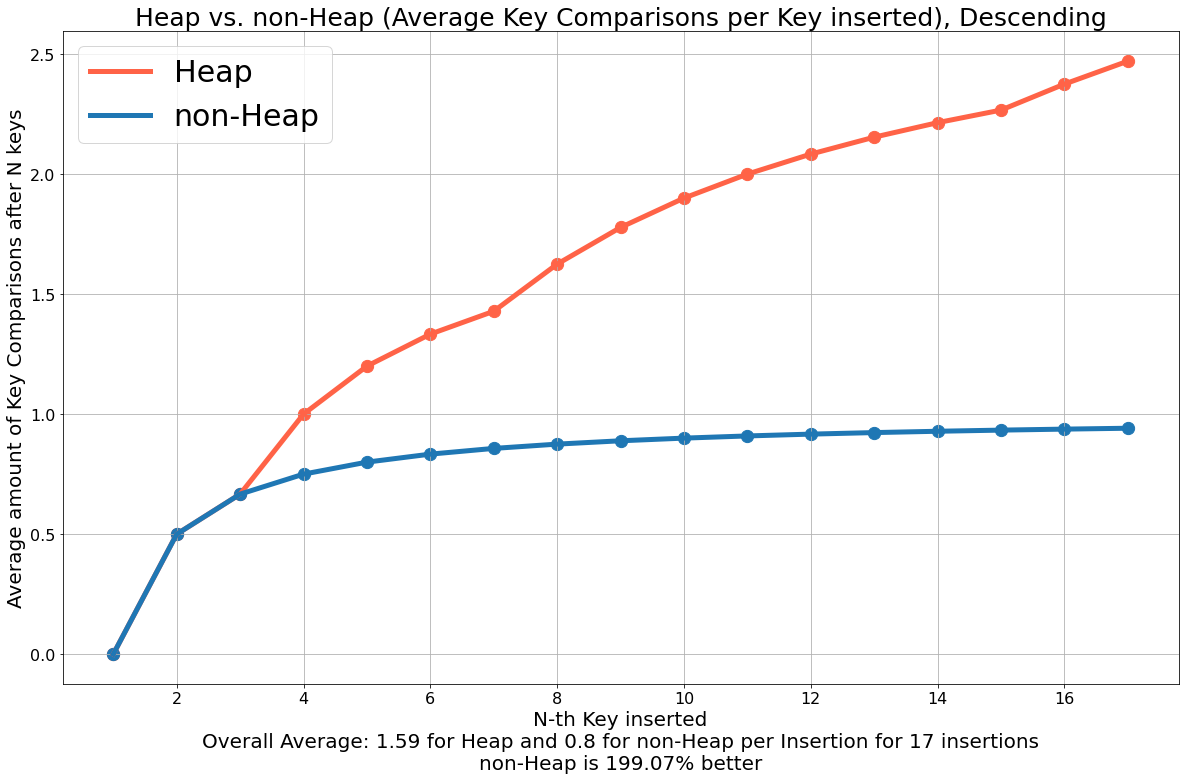

In [12]:
####################
N = 17 # Amount of Elements to be inserted in Descending Order, feel free to change
####################

insertions = list (range (1,N+1))
insertions.reverse ()
for j in insertions:
    stat_Insert_Key (str(j),j)
amt_keys_inserted = list(range(1, len (insertions)+1))
    
labelstrings = ["Heap vs. non-Heap (Sum of Key Comparisons), Descending, only Inserts", "N-th Key inserted", "Amount of Key Comparisons after N keys"]
Visualize (amt_keys_inserted, key_comparisons_per_operation, lin_key_comparisons_per_operation, labelstrings)

####################### Above Overall Sum, below Average per Insert

calculate_average ()
    
labelstring = ["Heap vs. non-Heap (Average Key Comparisons per Key inserted), Descending", "N-th Key inserted", "Average amount of Key Comparisons after N keys"]
Visualize (amt_keys_inserted, avg_comparisons_per_operation, lin_avg_comparisons_per_operation, labelstring, overall_average = True)

ResetPQ () # Resets Data for next test (ignore)

<font size="6">"Average Case" simulated with a random Permutation of Numbers 1 through N being inserted</font>

Order of Elements being inserted (Priority): [5, 15, 2, 6, 10, 11, 4, 9, 7, 8, 13, 12, 16, 1, 14, 17, 3]


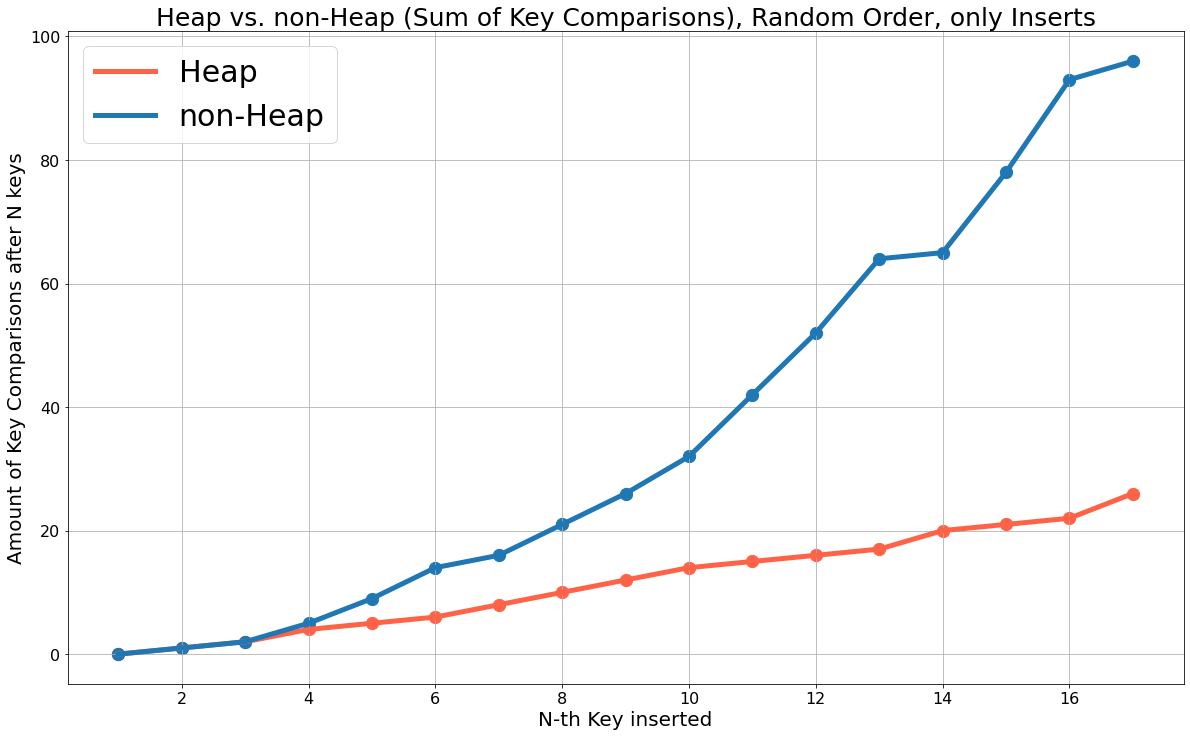

Order of Elements being inserted (Priority): [5, 15, 2, 6, 10, 11, 4, 9, 7, 8, 13, 12, 16, 1, 14, 17, 3]


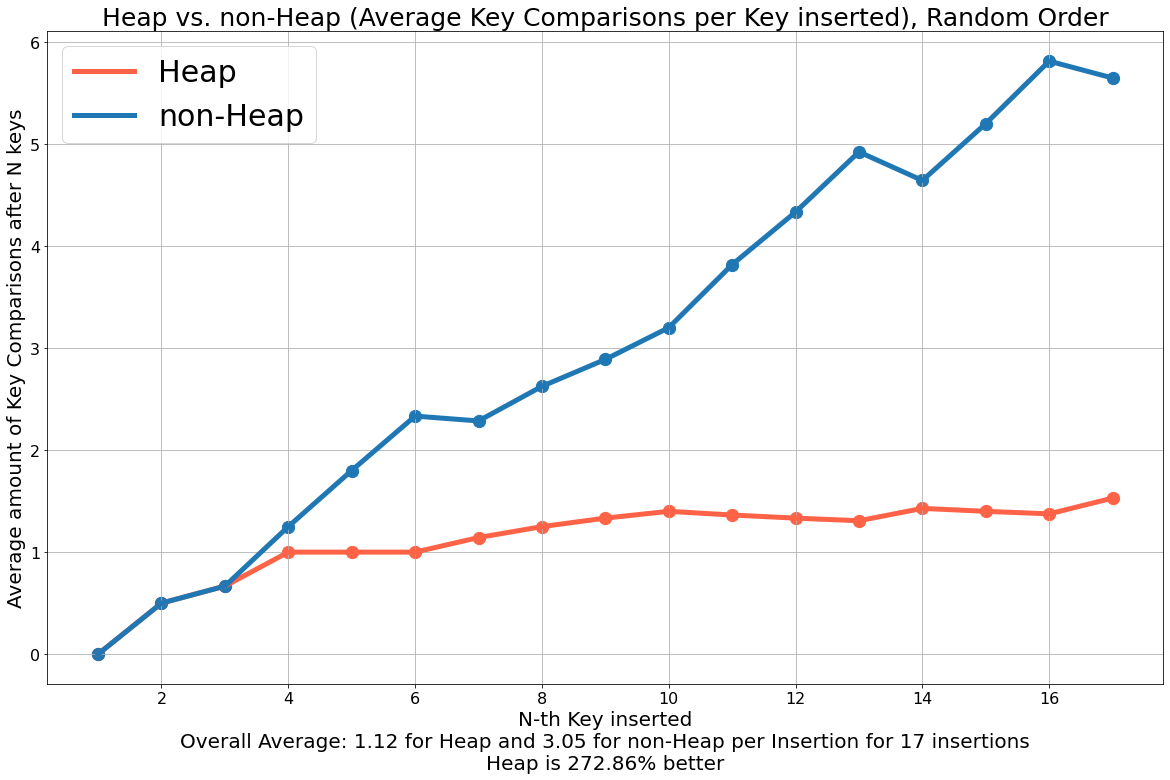

In [13]:
from random import shuffle
####################
N = 17 # amount of numbers to be inserted in random order, feel free to change
####################

insertions = list (range (1,N+1))   
shuffle(insertions) # random Permutation
for j in insertions:
    stat_Insert_Key (str(j),j)
amt_keys_inserted = list(range(1, len (insertions)+1))
 
print ("Order of Elements being inserted (Priority):", insertions)

labelstrings = ["Heap vs. non-Heap (Sum of Key Comparisons), Random Order, only Inserts", "N-th Key inserted", "Amount of Key Comparisons after N keys"]
Visualize (amt_keys_inserted, key_comparisons_per_operation, lin_key_comparisons_per_operation, labelstrings)

####################### Above Overall Sum, below Average per Insert

calculate_average ()
    
print ("Order of Elements being inserted (Priority):", insertions)

labelstring = ["Heap vs. non-Heap (Average Key Comparisons per Key inserted), Random Order", "N-th Key inserted", "Average amount of Key Comparisons after N keys"]
Visualize (amt_keys_inserted, avg_comparisons_per_operation, lin_avg_comparisons_per_operation, labelstring, overall_average = True)

ResetPQ ()

<font size="6">Function which prevents Underflows caused by Randomness</font>

In [14]:
# e.g "insert-insert-extract" is a legal operation while its permutation "extract-insert-insert" is not. This Function prevents cases like that and changes the permutation 
# to be a legal operation. If possible
def makesureitworks (operations, amt_inserts, amt_extracts, amt_reductions):
    if amt_extracts > amt_inserts:
        print ("\nERROR: Too many Extractions, Underflow!")
        return
    if amt_inserts - amt_extracts < amt_reductions+1:
        print ("\nERROR: Too many Reductions, Underflow!")
        return
    amt_elements = 0
    for index,j in enumerate(operations):
        if j == 0:
            amt_elements -= 1
        else:
            if j != -1:
                amt_elements += 1      
        if amt_elements <= 0:
            swapindex = index
            while swapindex < len (operations)-1:
                swapindex += 1
                if (operations [swapindex] != 0 and operations [swapindex] != -1):
                    break
            operations [index], operations [swapindex] = operations [swapindex], operations [index]
            if j == 0:
                amt_elements += 2 # because it prevents an extraction and replaces/swaps places with an insertion
            else:
                amt_elements += 1 # because it swaps a Reduction with an insertion

<font size="6">The same random Permutation as before but including Extract_Min and Reduce_Key</font>

[1, 6, 9, 0, 7, -1, 11, 5, 0, 10, 4, 13, -1, 0, 2, 14, 8, -1, 3, 12, 15]
Order of Elements being inserted (Priority), 0 for Extraction, -1 for Reduction: [1, 6, 9, 0, 7, -1, 11, 5, 0, 10, 4, 13, -1, 0, 2, 14, 8, -1, 3, 12, 15]


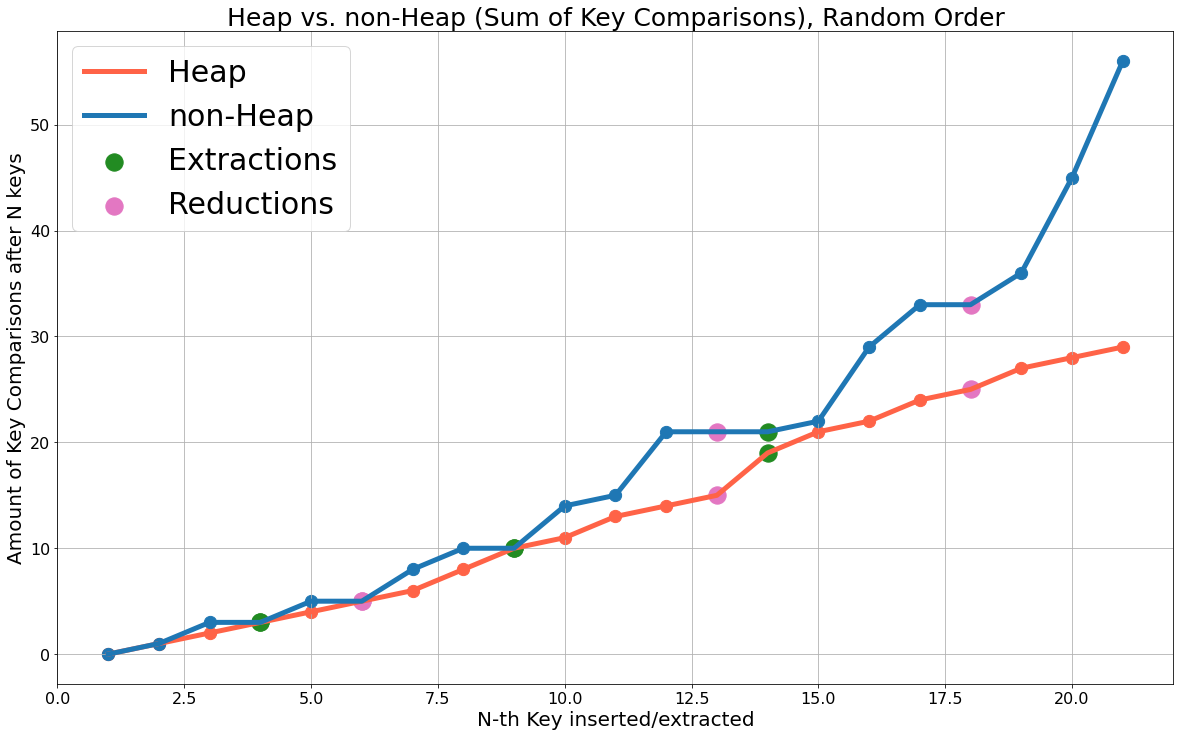

Order of Elements being inserted (Priority), 0 for Extraction, -1 for Reduction: [1, 6, 9, 0, 7, -1, 11, 5, 0, 10, 4, 13, -1, 0, 2, 14, 8, -1, 3, 12, 15]


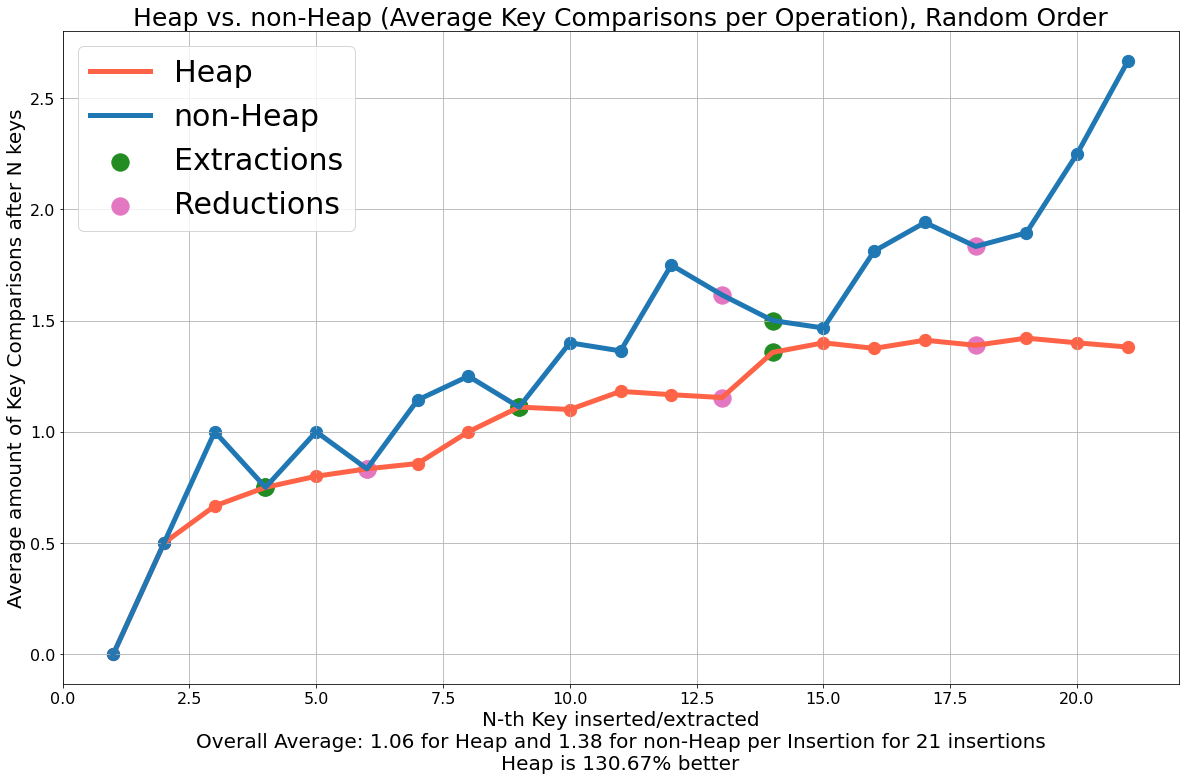

In [15]:
from random import shuffle
####################
N = 15 # amount of Elements to be extracted, feel free to change this aswell as Extractions and Key_Reductions.
Extractions = 3 # amount of Extractions. Note that it may not be higher than the amount of Elements inserted
Key_Reductions = 3 # amount of Key_Reductions (Decrease_Key)
####################
      
operations = list (range (1,N+1))
for _ in range (1,Extractions+1):
    operations.append (0)  
for _ in range (1,Key_Reductions+1):
    operations.append (-1)   
shuffle (operations)
print (operations)
makesureitworks (operations, N, Extractions, Key_Reductions)
for index,j in enumerate(operations):
    if j == 0:
        stat_Extract_Min ()
        extraction_indices.append (index+1) # for graphical highlighting
    elif j == -1:
        stat_Reduce_Priority ()
        reduction_indices.append (index+1)
    else:
        stat_Insert_Key (str(j),j)
amt_operations = list(range(1, len (operations)+1))
print ("Order of Elements being inserted (Priority), 0 for Extraction, -1 for Reduction:", operations)

labelstrings = ["Heap vs. non-Heap (Sum of Key Comparisons), Random Order", "N-th Key inserted/extracted", "Amount of Key Comparisons after N keys"]
Visualize (amt_operations, key_comparisons_per_operation, lin_key_comparisons_per_operation, labelstrings)

####################### Above Overall Sum, below Average per Insert

calculate_average ()
        
print ("Order of Elements being inserted (Priority), 0 for Extraction, -1 for Reduction:", operations)

labelstring = ["Heap vs. non-Heap (Average Key Comparisons per Operation), Random Order", "N-th Key inserted/extracted", "Average amount of Key Comparisons after N keys"]
Visualize (amt_operations, avg_comparisons_per_operation, lin_avg_comparisons_per_operation, labelstring, overall_average = True)

ResetPQ ()